# About me
Hi everyone! My name is Pablo and I am from Spain. I've just finished my Master's Degree at National Tsing Hua University (Taiwan) with a focus on DS & ML. I speak English, Chinese, Spanish and Portuguese. BTW, I'm looking for a Data Scientist position!

# Index
### 01 - Exploratory Data Analysis (EDA), Data Cleaning & Feature Engineering
> #### 01.1 - Do clients use their credit card?
> #### 01.2 - How much do they spend?
> #### 01.3 - How much can they spend?
> #### 01.4 - Do they pay back? When?
> #### 01.5 - Multiple plots to grasp some notion of what's going on: Data Insights
> #### 01.6 - Try to spot correlations
> #### 01.7 - One-hot encoding of class-labels
> #### 01.8 - Standarization and Scaler
### 02 - Model 1: Logistic Regression
It doesn't work very well... So what now?
### 03 - Data Augmentation: SMOTE
### 04 - Model 2: Logistic Regression + Data Augmentation
The performance seems to be better than the Logistic Regression without extra data! Let's try other models then.
### 05 - Model 3: LDA (Linear Discriminant Analysis) + Data Augmentation
### 06 - Model 4: Decision Tree + Data Augmentation
### 07 - Model 5: Random Forest + Data Augmentation
Ok, this one seems to work pretty good. However, what if the explore a neural network approach?
### 08 - Model 6: Feed-forward Neural Network + Data Augmentation
### 09 - Prediction for test data
### 10 - Conclusion
 - I spent the majority of the time doing **data cleaning** and **feature engineering**, as I understand the importance of having "workable", clean data.
 - The **data exploration** is not as exhaustive as I would have liked it, but some insights were found.
 - I also did **data augmentation** since the EDA revealed the lack of balanced data for our target.
 - Several **models** were implemented and several **scores** were calculated.
 
<br> Let's see what models we implemented:
 - **Logistic regression**: f1-score **94%** and **9%** for the two labels. **ROC area = 0.52**.
<br>
 - **Logistic regression + data augmentation**: f1-score **69%** and **67%** for the two labels. **ROC area = 0.68**.
<br>
 - **LDA + data augmentation**: f1-score **69%** and **67%** for the two labels. **ROC area = 0.68**.
<br>
 - **Decision tree + data augmentation**: f1-score **83%** and **84%** for the two labels. **ROC area = 0.84**.
<br>
 - **Random forest + data augmentation**: f1-score **90%** and **90%** for the two labels. **ROC area = 0.90**.
<br>
 - **Neural network + data augmentation**: f1-score **73%** and **68%** for the two labels. **ROC area = 0.70**.

# 01 - Exploratory Data Analysis (EDA), Data Cleaning & Feature Engineering

In [1002]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("train.csv")
df.head(5)

,id,credit_limit,gender,education_level,marital_status,age,payment_delay_month4(larger value means longer delay),payment_delay_month3(larger value means longer delay),payment_delay_month2(larger value means longer delay),payment_delay_month1(larger value means longer delay),bill_amount_month4,bill_amount_month3,bill_amount_month2,bill_amount_month1,previous_payment_month4,previous_payment_month3,previous_payment_month2,previous_payment_month1,label_month5_payment
0,0,75659.32872,M,graduate_school,married,53.0,-1.0,0.0,0.0,0.0,43.673872,97.336043,617.642189,515.513381,97.336043,617.642189,515.513381,0.000000,0
1,1,10119.28851,F,high_school,married,46.0,0.0,0.0,NaN,1.0,2.378414,217.039935,107.684919,220.712322,209.732445,0.000000,100.594674,22.241495,0
2,2,13374.80610,F,university,married,31.0,1.0,1.0,1.0,1.0,14301.916330,13506.342420,5892.633733,6291.752821,397.170110,752.120619,397.170110,397.501113,0
3,3,157744.09660,M,graduate_school,married,34.0,0.0,0.0,0.0,1.0,8154.002723,14278.876050,18234.124720,13042.939540,14368.707270,18400.055470,1547.887184,2.558114,0
4,5,120385.03030,F,graduate_school,single,29.0,1.0,1.0,1.0,1.0,10575.092340,7130.249304,1572.472869,NaN,193.835523,397.170110,0.000000,1395.861422,0


In [1003]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20649 entries, 0 to 20648
Data columns (total 19 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   id                                                     20649 non-null  int64  
 1   credit_limit                                           20649 non-null  float64
 2   gender                                                 20493 non-null  object 
 3   education_level                                        20431 non-null  object 
 4   marital_status                                         20510 non-null  object 
 5   age                                                    20508 non-null  float64
 6   payment_delay_month4(larger value means longer delay)  20591 non-null  float64
 7   payment_delay_month3(larger value means longer delay)  20576 non-null  float64
 8   payment_delay_month2(larger value means longer

First, **ID column is removed**, since it does not represent any useful information (we will have the **index column** to identify entries).
Then, object data type columns (gender, education_level and marital_status) will be converted to **one-hot-encoding**.

We can observe that, from the total amount of entries (20649), all the columns have more than 20000 valid values. The **first (and quick) approach** would be to **get rid of all the rows containing null values** and see if the amount of valid entries is worth it.

In [1004]:
df = df.drop(['id'], axis=1)
df_first_approach = df.dropna()
df_first_approach.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18454 entries, 0 to 20648
Data columns (total 18 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   credit_limit                                           18454 non-null  float64
 1   gender                                                 18454 non-null  object 
 2   education_level                                        18454 non-null  object 
 3   marital_status                                         18454 non-null  object 
 4   age                                                    18454 non-null  float64
 5   payment_delay_month4(larger value means longer delay)  18454 non-null  float64
 6   payment_delay_month3(larger value means longer delay)  18454 non-null  float64
 7   payment_delay_month2(larger value means longer delay)  18454 non-null  float64
 8   payment_delay_month1(larger value means longer

,credit_limit,gender,education_level,marital_status,age,payment_delay_month4(larger value means longer delay),payment_delay_month3(larger value means longer delay),payment_delay_month2(larger value means longer delay),payment_delay_month1(larger value means longer delay),bill_amount_month4,bill_amount_month3,bill_amount_month2,bill_amount_month1,previous_payment_month4,previous_payment_month3,previous_payment_month2,previous_payment_month1,label_month5_payment
0,75659.32872,M,graduate_school,married,53.0,-1.0,0.0,0.0,0.0,43.673872,97.336043,617.642189,515.513381,97.336043,617.642189,515.513381,0.000000,0
1,10119.28851,F,high_school,married,46.0,0.0,0.0,NaN,1.0,2.378414,217.039935,107.684919,220.712322,209.732445,0.000000,100.594674,22.241495,0
2,13374.80610,F,university,married,31.0,1.0,1.0,1.0,1.0,14301.916330,13506.342420,5892.633733,6291.752821,397.170110,752.120619,397.170110,397.501113,0
3,157744.09660,M,graduate_school,married,34.0,0.0,0.0,0.0,1.0,8154.002723,14278.876050,18234.124720,13042.939540,14368.707270,18400.055470,1547.887184,2.558114,0
4,120385.03030,F,graduate_school,single,29.0,1.0,1.0,1.0,1.0,10575.092340,7130.249304,1572.472869,NaN,193.835523,397.170110,0.000000,1395.861422,0


In [1005]:
len(df_first_approach)

18454

Since we obtained **18454 valid entries (about 90% of the original un-cleaned dataset) when getting rid of all rows containing null values**, I decided to stick to this approach, and remove all NaN values, since handling missing values is a difficult task that may affect our data distribution.
<br> Another approach could have been substituting invalid values by the median, mean, zero, etc for each column. However, since we still have around 90% of the original data as valid entries, I decided to focus on other kinds of **feature engineering**.

<Figure size 432x288 with 0 Axes>

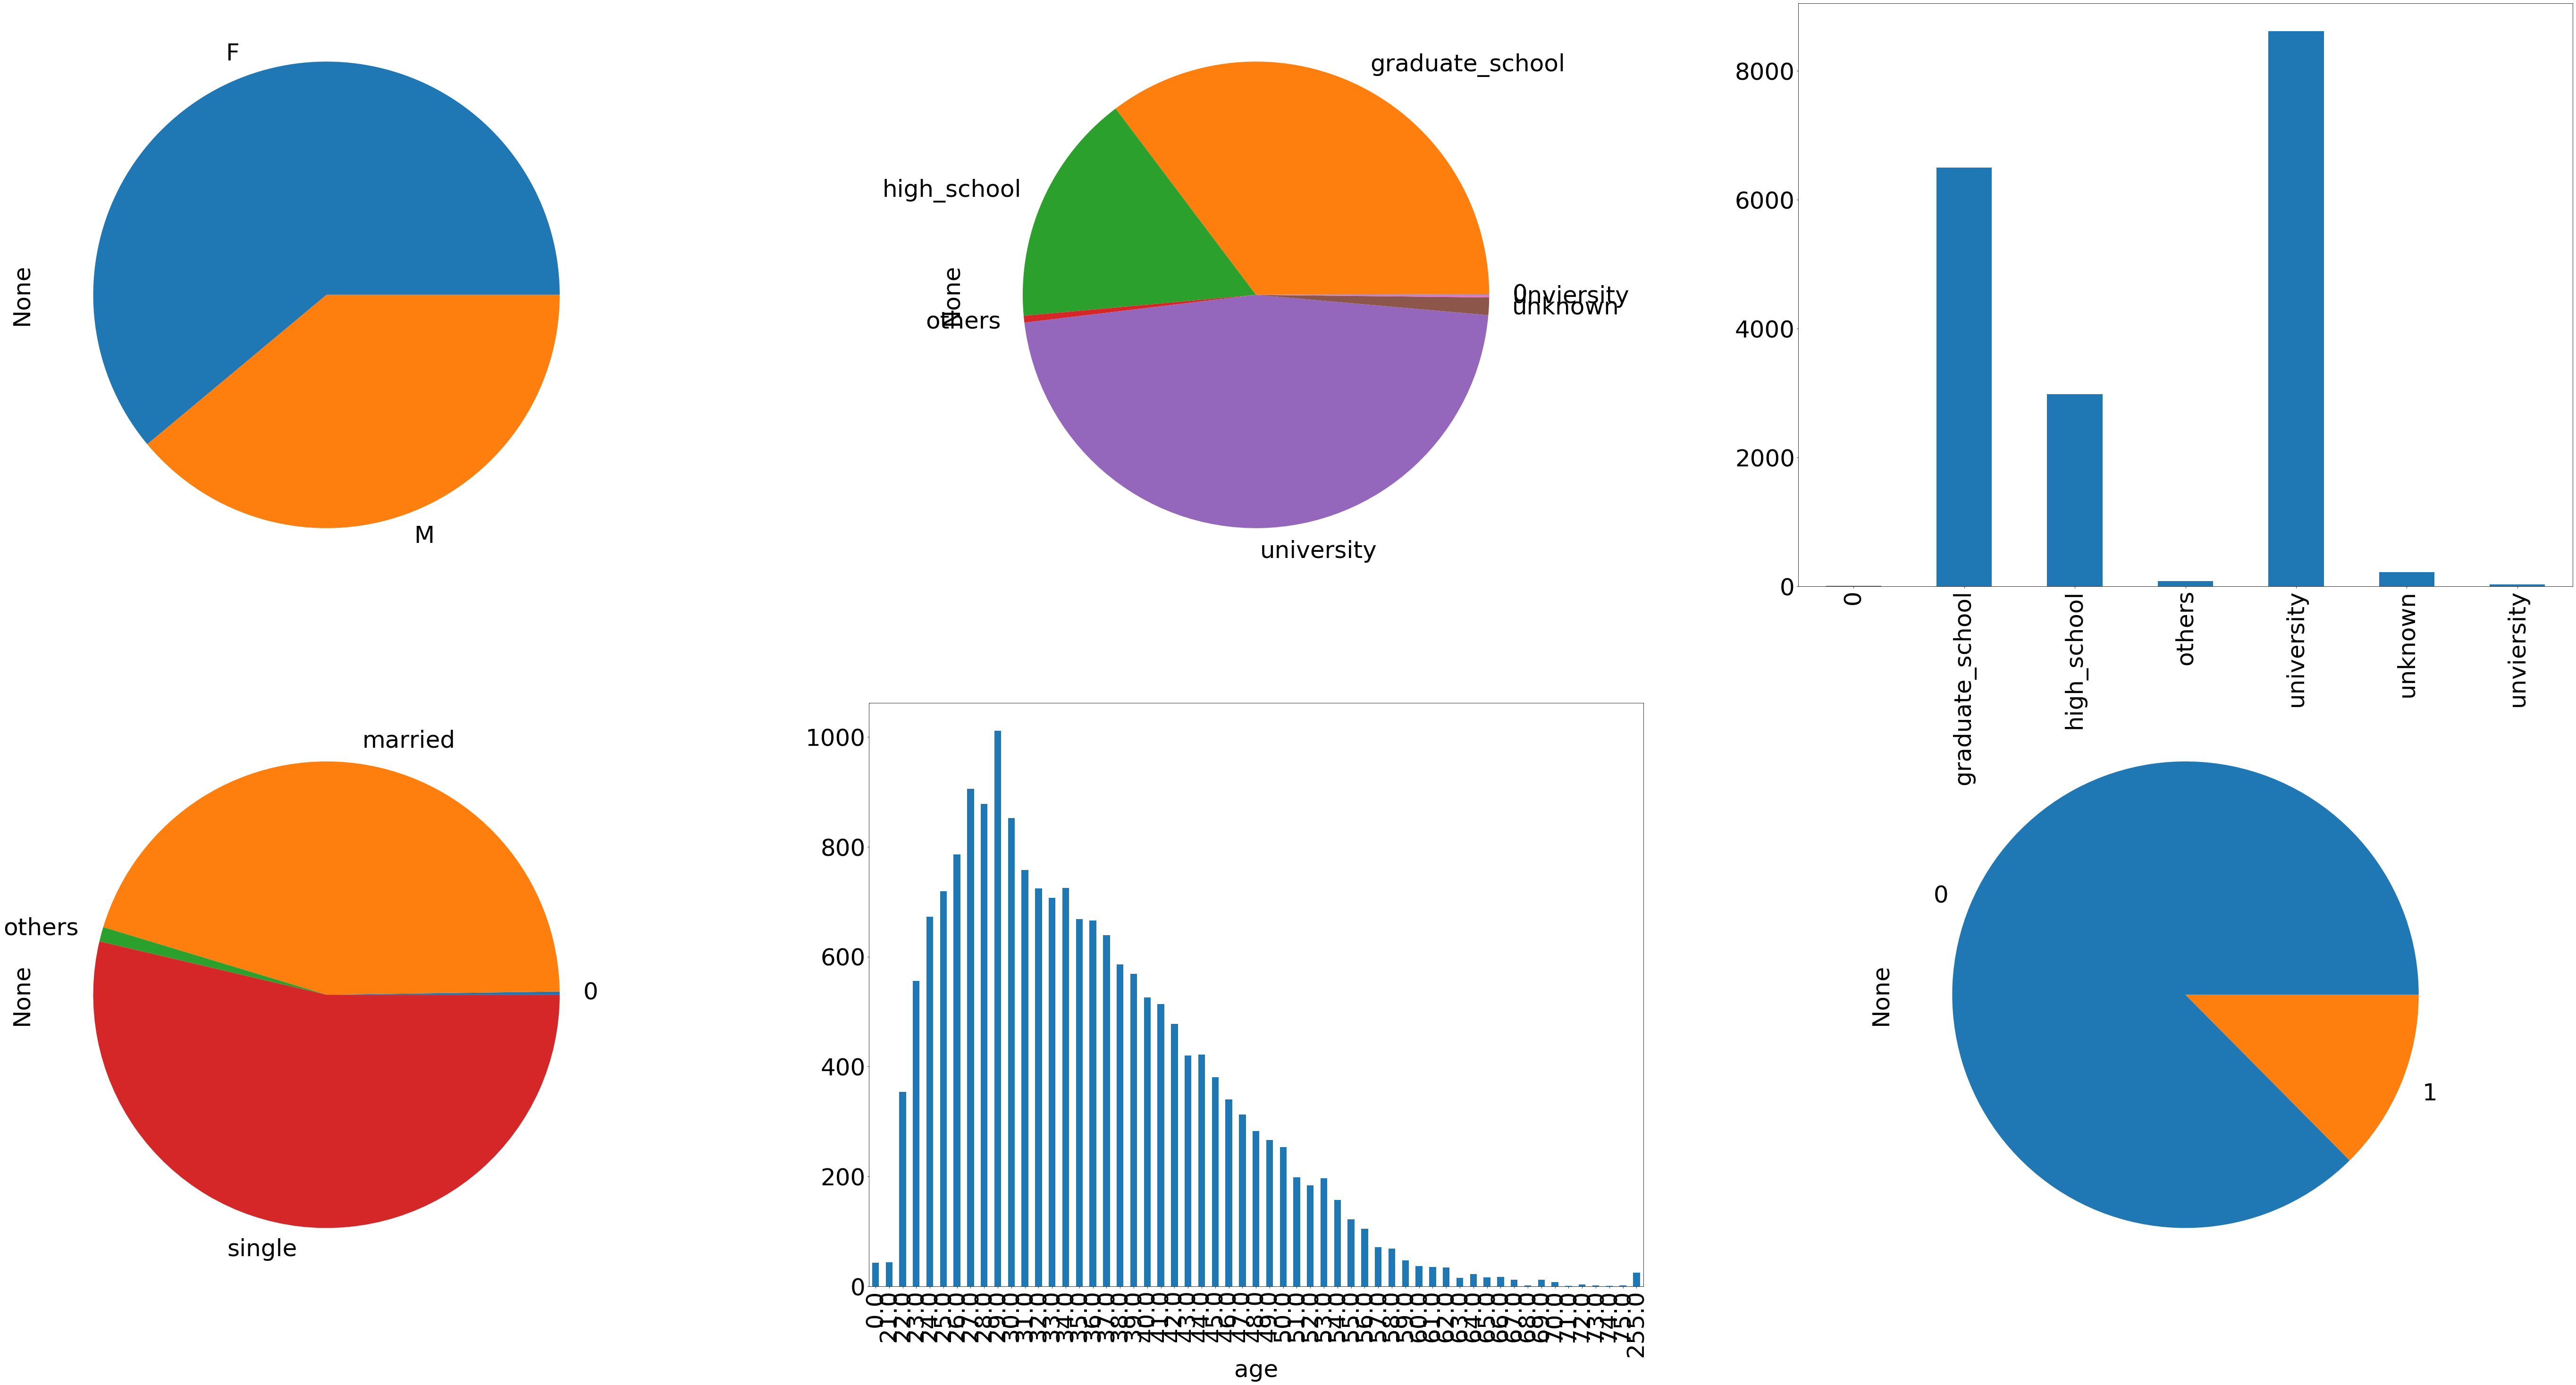

In [1006]:
plt.figure()
plt.rcParams.update({'font.size': 50})
plt.figure(figsize=(100,50))

by_gender = df_first_approach.groupby('gender')
by_education_level = df_first_approach.groupby('education_level')
by_marital_status = df_first_approach.groupby('marital_status')
by_age = df_first_approach.groupby('age')
target = df_first_approach.groupby('label_month5_payment')

plt.subplot(231)
by_gender.size().plot(kind='pie')
plt.subplot(232)
by_education_level.size().plot(kind='pie')
plt.subplot(233)
by_education_level.size().plot(kind='bar')
plt.subplot(234)
by_marital_status.size().plot(kind='pie')
plt.subplot(235)
by_age.size().plot(kind='bar')
plt.subplot(236)
target.size().plot(kind='pie')

plt.show()

Now that we have some notion of the data in our dataset, let's deal with invalid labels and entries, in order to **improve the quality of the data**, seeking to achieve a better performance of the ML algorithms:

 - **0 Education level = unknown Education level** (we don't know if 0 means illiterate or is just an error).
 - **unknown Education level != others Education level** (others can refer to PhD while unknown might be included in the university group).
 - **Unviersity = University**.
 - **0 Marital status = unknown Marital status** (we don't know if 0 means single).
 - **unknown Marital status != others Marital status** (others can refer so widowed while unknown might be included in single group).
 - **Age** column is divided into **5 groups** for the valid age range [0-110].

In [1007]:
df_first_approach.loc[df_first_approach['education_level'] == '0', 'education_level'] = 'unknown'
#df_first_approach.loc[df_first_approach['education_level'] == 'unknown', 'education_level'] = 'others'
df_first_approach.loc[df_first_approach['education_level'] == 'unviersity', 'education_level'] = 'university'
by_education_level = df_first_approach.groupby('education_level')
by_education_level.size()

C:\Users\palod\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


education_level
graduate_school    6502
high_school        2981
others               87
university         8652
unknown             232
dtype: int64

<Figure size 432x288 with 0 Axes>

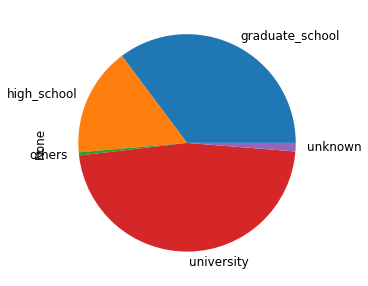

In [1008]:
plt.figure()
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10,5))
by_education_level.size().plot(kind='pie')

In [1009]:
df_first_approach.loc[df_first_approach['marital_status'] == '0', 'marital_status'] = 'unknown'
by_marital_status = df_first_approach.groupby('marital_status')
by_marital_status.size()

C:\Users\palod\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


marital_status
married    8324
others      185
single     9905
unknown      40
dtype: int64

C:\Users\palod\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\palod\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


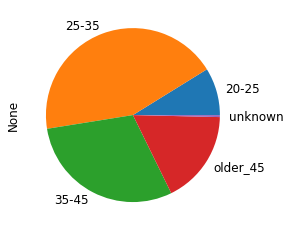

In [1011]:
df_first_approach.loc[df_first_approach['age'] >= 110, 'age_categorical'] = 'unknown'#df_first_approach['age'].median() #'unknown'
df_first_approach.loc[df_first_approach['age'] <= 0 , 'age_categorical'] = 'unknown'#df_first_approach['age'].median() #'unknown'

df_first_approach.loc[(df_first_approach['age'] <20) & (df_first_approach['age'] > 0) , 'age_categorical'] = 'under_20'
df_first_approach.loc[(df_first_approach['age']>=20) & (df_first_approach['age'] < 25) , 'age_categorical'] = '20-25'
df_first_approach.loc[(df_first_approach['age']>=25) & (df_first_approach['age'] < 35) , 'age_categorical'] = '25-35'
df_first_approach.loc[(df_first_approach['age']>=35) & (df_first_approach['age'] < 45) , 'age_categorical'] = '35-45'
df_first_approach.loc[(df_first_approach['age']>=45) & (df_first_approach['age'] < 110) , 'age_categorical'] = 'older_45'

by_age_cat = df_first_approach.groupby('age_categorical')
by_age_cat.size().plot(kind='pie')

### 01.1 - Do clients use their credit card? 

8.965535927170261


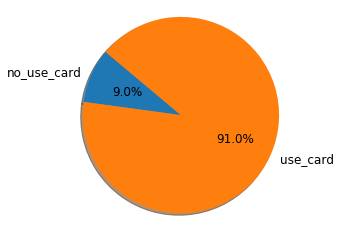

In [1012]:
percentage_no_bill_month_1 = len(df_first_approach[(df_first_approach['bill_amount_month1']==0)])*100/len(df_first_approach)
percentage_no_bill_month_2 = len(df_first_approach[(df_first_approach['bill_amount_month2']==0)])*100/len(df_first_approach)
percentage_no_bill_month_3 = len(df_first_approach[(df_first_approach['bill_amount_month3']==0)])*100/len(df_first_approach)
percentage_no_bill_month_4 = len(df_first_approach[(df_first_approach['bill_amount_month4']==0)])*100/len(df_first_approach)

percentage_no_bill = (percentage_no_bill_month_1+percentage_no_bill_month_2+percentage_no_bill_month_3+percentage_no_bill_month_4)/4
print(percentage_no_bill)
labels = 'no_use_card', 'use_card'
sizes = [percentage_no_bill, 100-percentage_no_bill]

# Plot
plt.pie(sizes, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In 4 months, on average, **9%** of the users **didn't use their credit cards**. <br>
That is, **91%** of the users **did use their credit cards**.

### 01.2 - How much do they spend?

In [1013]:
expenses_month_1_mean = df_first_approach['bill_amount_month1'].mean()
expenses_month_2_mean = df_first_approach['bill_amount_month2'].mean()
expenses_month_3_mean = df_first_approach['bill_amount_month3'].mean()
expenses_month_4_mean = df_first_approach['bill_amount_month4'].mean()

expenses_mean = (expenses_month_1_mean+expenses_month_2_mean+expenses_month_3_mean+expenses_month_4_mean)/4
print(expenses_mean)

16505.762478963356


The **mean of expenses** during 4 months, on average, are **16505** [corresponding currency]

### 01.3 - How much can they spend?

In [1014]:
print('Mean credit_limit: ', df_first_approach['credit_limit'].mean(axis = 0))
print('Median credit_limit: ', df_first_approach['credit_limit'].median(axis = 0))

Mean credit_limit:  67699.63954370597
Median credit_limit:  52806.70421


### 01.4 - Do they pay back? When?

Percentage of users paying earlier:  11.581499945811206
Percentage of users paying just on time:  19.396878725479567
Percentage of users paying late:  69.02162132870922


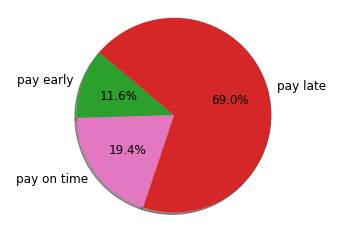

In [1015]:
month1_early = len(df_first_approach[(df_first_approach['payment_delay_month1(larger value means longer delay)']<0)])*100/len(df_first_approach)
month1_on_time = len(df_first_approach[(df_first_approach['payment_delay_month1(larger value means longer delay)']==0)])*100/len(df_first_approach)
month1_delay = len(df_first_approach[(df_first_approach['payment_delay_month1(larger value means longer delay)']>0)])*100/len(df_first_approach)

month2_early = len(df_first_approach[(df_first_approach['payment_delay_month2(larger value means longer delay)']<0)])*100/len(df_first_approach)
month2_on_time = len(df_first_approach[(df_first_approach['payment_delay_month2(larger value means longer delay)']==0)])*100/len(df_first_approach)
month2_delay = len(df_first_approach[(df_first_approach['payment_delay_month2(larger value means longer delay)']>0)])*100/len(df_first_approach)

month3_early = len(df_first_approach[(df_first_approach['payment_delay_month3(larger value means longer delay)']<0)])*100/len(df_first_approach)
month3_on_time = len(df_first_approach[(df_first_approach['payment_delay_month3(larger value means longer delay)']==0)])*100/len(df_first_approach)
month3_delay = len(df_first_approach[(df_first_approach['payment_delay_month3(larger value means longer delay)']>0)])*100/len(df_first_approach)

month4_early = len(df_first_approach[(df_first_approach['payment_delay_month4(larger value means longer delay)']<0)])*100/len(df_first_approach)
month4_on_time = len(df_first_approach[(df_first_approach['payment_delay_month4(larger value means longer delay)']==0)])*100/len(df_first_approach)
month4_delay = len(df_first_approach[(df_first_approach['payment_delay_month4(larger value means longer delay)']>0)])*100/len(df_first_approach)

total_early = (month1_early+month2_early+month3_early+month4_early)/4
total_on_time = (month1_on_time+month2_on_time+month3_on_time+month4_on_time)/4
total_delay = (month1_delay+month2_delay+month3_delay+month4_delay)/4

print('Percentage of users paying earlier: ', total_early)
print('Percentage of users paying just on time: ', total_on_time)
print('Percentage of users paying late: ', total_delay)

labels = 'pay early', 'pay on time', 'pay late'
sizes = [total_early, total_on_time, total_delay]
colors = ['tab:green', 'tab:pink', 'tab:red']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

**Payments:** payments are made the month after, that is, month 1 bill is payed on month 2:

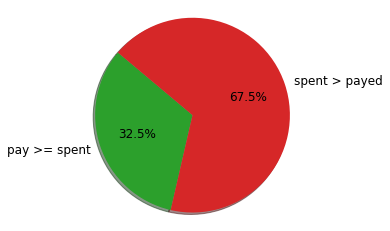

In [1016]:
m1_pay_more_than_spent = len(df_first_approach[(df_first_approach['bill_amount_month1']<=df_first_approach['previous_payment_month2'])])*100/len(df_first_approach)
m2_pay_more_than_spent = len(df_first_approach[(df_first_approach['bill_amount_month2']<=df_first_approach['previous_payment_month3'])])*100/len(df_first_approach)
m3_pay_more_than_spent = len(df_first_approach[(df_first_approach['bill_amount_month3']<=df_first_approach['previous_payment_month4'])])*100/len(df_first_approach)

pay_more_than_spent = (m1_pay_more_than_spent+m2_pay_more_than_spent+m3_pay_more_than_spent)/3

labels = 'pay >= spent', 'spent > payed'
sizes = [pay_more_than_spent, 100-pay_more_than_spent]
colors = ['tab:green', 'tab:red']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

### 01.5 - Multiple plots to grasp some notion of what's going on: Data Insights

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023050F34748>,
      dtype=object)

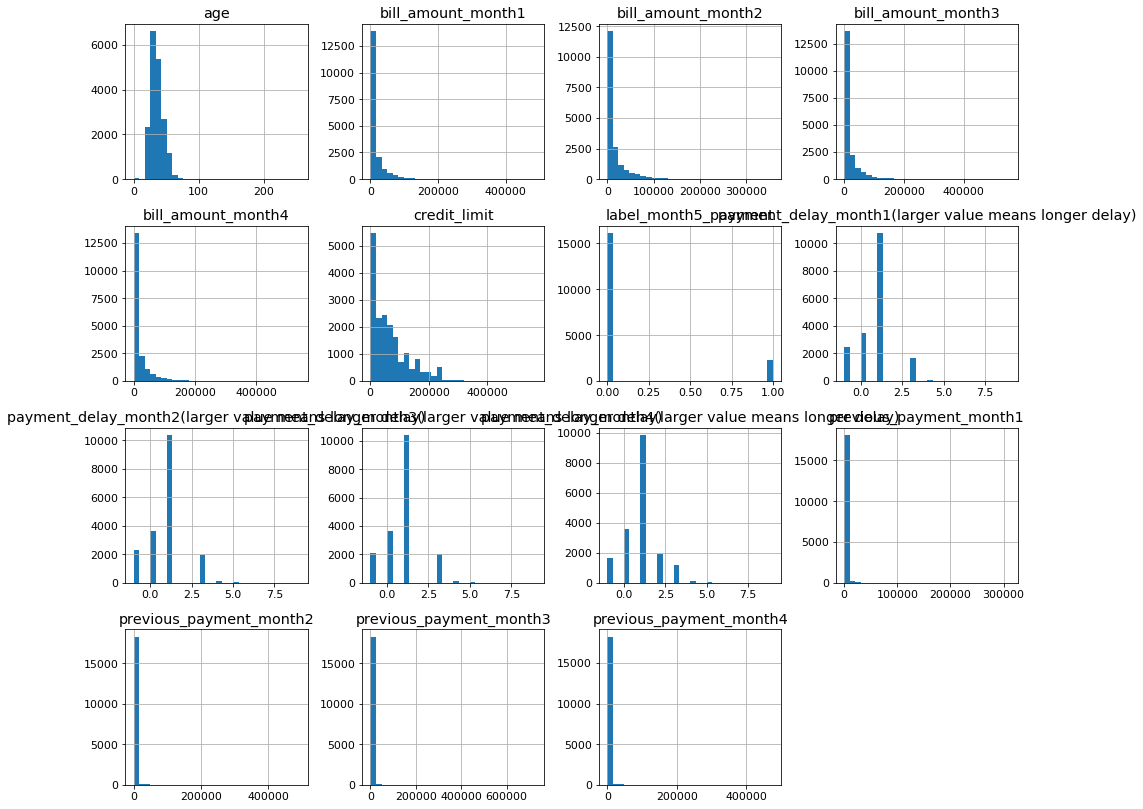

In [1017]:
df_first_approach.hist(figsize=(16, 14), bins=30, xlabelsize=11, ylabelsize=11)

Insights from data:
<br> <br> Identification:
- **'id'**: no relevance, we can get rid of it (use dataframe index instead).

<br> People's features:
- **'gender'**: slighlty unbalanced, there are more female than male in our data.
- **'education_level'**: almost half of the people have university education and more than a quarter have graduate degrees.
- **'marital_status'**: about half are married and half single.
- **'age'**: we have more data of people in the late 20's. Pretty much data in the range 20-40'as well.

In general, there is variety regarding people's features in our dataset, with certain lack of data distribution when age > 45 or age < 25 years old. Also, there are a **bunch of unvalid values that we need to deal with** (age=0, age>100, spealling mistakes in labels like 'unviersity' instead of 'university', etc).

<br> Payments:
- **'credit_limit'**
- **'payment_delay_month 1 2 3 & 4 (larger value means longer delay)'**
- **'bill_amount_month 1 2 3 & 4'**
- **'previous_payment_month 1 2 3 & 4'**
- **'label_month5_payment'**

Most of the people in the dataset make some payments (monthly bill > 0). Credit limits' **mean** is almost 70000, where the **median** is around 50000. Credit limits' are lower than the bills and **both trends behave similarly**. Most of the people tend to **pay late** and also most of the people tend to **spend more than what they will pay for**.

### 01.6 - Try to spot correlations

In [1018]:
df_first_approach.corr(method ='pearson')

,credit_limit,age,payment_delay_month4(larger value means longer delay),payment_delay_month3(larger value means longer delay),payment_delay_month2(larger value means longer delay),payment_delay_month1(larger value means longer delay),bill_amount_month4,bill_amount_month3,bill_amount_month2,bill_amount_month1,previous_payment_month4,previous_payment_month3,previous_payment_month2,previous_payment_month1,label_month5_payment
credit_limit,1.000000,0.099552,-0.254937,-0.266390,-0.251124,-0.234448,0.317914,0.314324,0.319577,0.327860,0.148973,0.136988,0.167361,0.165900,-0.117274
age,0.099552,1.000000,-0.039193,-0.048872,-0.047922,-0.047443,0.048291,0.045583,0.043756,0.042739,0.016229,0.011298,0.024191,0.014348,-0.000829
payment_delay_month4(larger value means longer delay),-0.254937,-0.039193,1.000000,0.680871,0.572083,0.532929,0.165507,0.163568,0.157524,0.152553,-0.059431,-0.051314,-0.046846,-0.048796,0.289819
payment_delay_month3(larger value means longer delay),-0.266390,-0.048872,0.680871,1.000000,0.754083,0.656499,0.189590,0.187129,0.181956,0.176863,-0.065395,-0.045875,-0.039109,-0.039773,0.224598
payment_delay_month2(larger value means longer delay),-0.251124,-0.047922,0.572083,0.754083,1.000000,0.765954,0.173128,0.192893,0.189596,0.184774,-0.006831,-0.049581,-0.038179,-0.038467,0.195719
payment_delay_month1(larger value means longer delay),-0.234448,-0.047443,0.532929,0.656499,0.765954,1.000000,0.172129,0.187682,0.206639,0.202992,-0.013154,-0.005584,-0.053453,-0.036822,0.174039
bill_amount_month4,0.317914,0.048291,0.165507,0.189590,0.173128,0.172129,1.000000,0.952475,0.906096,0.867601,0.081536,0.059444,0.147795,0.113338,-0.013398
bill_amount_month3,0.314324,0.045583,0.163568,0.187129,0.192893,0.187682,0.952475,1.000000,0.940106,0.895737,0.207476,0.080210,0.148155,0.101355,-0.009402
bill_amount_month2,0.319577,0.043756,0.157524,0.181956,0.189596,0.206639,0.906096,0.940106,1.000000,0.936798,0.184579,0.195627,0.105000,0.089192,-0.008781
bill_amount_month1,0.327860,0.042739,0.152553,0.176863,0.184774,0.202992,0.867601,0.895737,0.936798,1.000000,0.173171,0.151634,0.250963,0.095182,-0.004908


### Correlated features to our arget: label_month5_payment

In [1019]:
df_num_corr = df.corr()['label_month5_payment'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.2].sort_values(ascending=False)
print("There are {} strongly correlated values with label_month5_payment:\n{}".format(len(golden_features_list), golden_features_list))

There are 2 strongly correlated values with label_month5_payment:
payment_delay_month4(larger value means longer delay)    0.277034
payment_delay_month3(larger value means longer delay)    0.217768
Name: label_month5_payment, dtype: float64


In [1020]:
df.describe()

,credit_limit,age,payment_delay_month4(larger value means longer delay),payment_delay_month3(larger value means longer delay),payment_delay_month2(larger value means longer delay),payment_delay_month1(larger value means longer delay),bill_amount_month4,bill_amount_month3,bill_amount_month2,bill_amount_month1,previous_payment_month4,previous_payment_month3,previous_payment_month2,previous_payment_month1,label_month5_payment
count,20649.000000,20508.000000,20591.000000,20576.000000,20630.000000,20587.000000,20200.000000,20134.000000,20072.000000,20142.000000,20609.000000,20619.000000,20584.000000,20629.000000,20649.000000
mean,68740.122741,35.701287,0.891555,0.785381,0.759089,0.713509,17566.107286,16804.577554,15879.401317,14451.622958,1379.720663,1476.947104,1279.424302,1160.473618,0.123977
std,62774.700876,12.450595,1.056878,1.129699,1.131490,1.100866,30969.151735,29887.984238,28339.166825,26381.240246,7045.820783,9613.550814,7626.208136,5994.219687,0.329563
min,1788.854382,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16798.250460,28.000000,0.000000,0.000000,0.000000,0.000000,602.360446,511.550012,468.022069,391.056540,102.989445,100.594674,40.190789,25.351146,0.000000
50%,52806.704210,34.000000,1.000000,1.000000,1.000000,1.000000,5268.484703,4945.392125,4521.385628,4132.008741,273.668783,256.574183,237.089520,181.019336,0.000000
75%,100000.000000,41.000000,1.000000,1.000000,1.000000,1.000000,20012.600110,19113.165365,17603.542878,15762.261530,808.946548,761.345360,752.120619,632.137192,0.000000
max,565685.424900,255.000000,9.000000,9.000000,9.000000,9.000000,540703.238100,554345.841400,357761.944900,490093.609600,477733.770400,730578.640800,493155.902900,311845.505700,1.000000


### 01.7 - One-hot encoding of class-labels

In [1021]:
# use pd.concat to join the new columns with the original dataframe
df = df_first_approach
df = pd.concat([df_first_approach,pd.get_dummies(df['gender'], prefix='gender',drop_first=True)],axis=1)
df = pd.concat([df,pd.get_dummies(df['education_level'], prefix='education_level',drop_first=True)],axis=1)
df = pd.concat([df,pd.get_dummies(df['marital_status'], prefix='marital_status',drop_first=True)],axis=1)
df = pd.concat([df,pd.get_dummies(df['age_categorical'], prefix='age_categorical',drop_first=True)],axis=1)


# now drop the original columns
df.drop(['gender'],axis=1, inplace=True)
df.drop(['education_level'],axis=1, inplace=True)
df.drop(['marital_status'],axis=1, inplace=True)
df.drop(['age'],axis=1, inplace=True)
df.drop(['age_categorical'],axis=1, inplace=True)
df.head()

,credit_limit,payment_delay_month4(larger value means longer delay),payment_delay_month3(larger value means longer delay),payment_delay_month2(larger value means longer delay),payment_delay_month1(larger value means longer delay),bill_amount_month4,bill_amount_month3,bill_amount_month2,bill_amount_month1,previous_payment_month4,...,education_level_others,education_level_university,education_level_unknown,marital_status_others,marital_status_single,marital_status_unknown,age_categorical_25-35,age_categorical_35-45,age_categorical_older_45,age_categorical_unknown
0,75659.32872,-1.0,0.0,0.0,0.0,43.673872,97.336043,617.642189,515.513381,97.336043,...,0,0,0,0,0,0,0,0,1,0
2,13374.80610,1.0,1.0,1.0,1.0,14301.916330,13506.342420,5892.633733,6291.752821,397.170110,...,0,1,0,0,0,0,1,0,0,0
3,157744.09660,0.0,0.0,0.0,1.0,8154.002723,14278.876050,18234.124720,13042.939540,14368.707270,...,0,0,0,0,0,0,1,0,0,0
5,27885.48009,1.0,1.0,1.0,1.0,27001.790740,24331.012430,19679.265230,8087.427712,438.626650,...,0,1,0,0,1,0,0,0,0,0
6,39953.19792,2.0,-1.0,-1.0,-1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,1,0,0,0,0,1,0,0,0


### 01.8 - Standarization and Scaler

For the algorithms that use gradient descent (neural networks, linearregression, logistic regression, etc), the difference in ranges of features will **cause different gradient descent step sizes for each feature**. We need to ensure that the steps are smooth across features by **scaling the data**. This is required also for distace-based algorithms, which use distances between data points to determine the similarity between features.
<br> <br> First, I **standarized (std=1) the features that involve pricing (credit limit, bills, payments)** to put them in the same range.
<br> <br> Then, I **scaled all the features in the range[0,1]**.

In [1022]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler() 

data = df
data['credit_limit'] = scaler.fit_transform(data['credit_limit'].values.reshape(-1, 1))
data['bill_amount_month1'] = scaler.fit_transform(data['bill_amount_month1'].values.reshape(-1, 1))
data['bill_amount_month2'] = scaler.fit_transform(data['bill_amount_month2'].values.reshape(-1, 1))
data['bill_amount_month3'] = scaler.fit_transform(data['bill_amount_month3'].values.reshape(-1, 1))
data['bill_amount_month4'] = scaler.fit_transform(data['bill_amount_month4'].values.reshape(-1, 1))
data['previous_payment_month1'] = scaler.fit_transform(data['previous_payment_month1'].values.reshape(-1, 1))
data['previous_payment_month2'] = scaler.fit_transform(data['previous_payment_month2'].values.reshape(-1, 1))
data['previous_payment_month3'] = scaler.fit_transform(data['previous_payment_month3'].values.reshape(-1, 1))
data['previous_payment_month4'] = scaler.fit_transform(data['previous_payment_month4'].values.reshape(-1, 1))

scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

df_store_for_data_augmentation = data
data.head()

,credit_limit,payment_delay_month4(larger value means longer delay),payment_delay_month3(larger value means longer delay),payment_delay_month2(larger value means longer delay),payment_delay_month1(larger value means longer delay),bill_amount_month4,bill_amount_month3,bill_amount_month2,bill_amount_month1,previous_payment_month4,...,education_level_others,education_level_university,education_level_unknown,marital_status_others,marital_status_single,marital_status_unknown,age_categorical_25-35,age_categorical_35-45,age_categorical_older_45,age_categorical_unknown
0,0.131000,0.0,0.1,0.1,0.1,0.000081,0.000176,0.001726,0.001052,0.000204,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.020546,0.2,0.2,0.2,0.2,0.026451,0.024364,0.016471,0.012838,0.000831,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.276567,0.1,0.1,0.1,0.2,0.015080,0.025758,0.050967,0.026613,0.030077,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.046279,0.2,0.2,0.2,0.2,0.049938,0.043891,0.055007,0.016502,0.000918,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.067680,0.3,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# 02 - Model 1: Logistic Regression

In [1023]:
df_copy = data
y = df_copy['label_month5_payment']
df_copy.drop(['label_month5_payment'],axis=1, inplace=True)
X = df_copy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f} (no data augmentation)'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89 (no data augmentation)


The accuracy of the Logistic Regression (89%) **seems to be pretty good, but...** Let's inspect the **confusion matrix** to make sure the performance of the algorithm is actually good:

In [1024]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3245   13]
 [ 411   22]]


For the label 0, the models identifies correctly most of the cases. However, **it seems it tends to predict 0 all the time!**. Only **22/433 (5%)** label 1 cases are retrieved correctly. **This is very bad**. Let's make the classification report, plot the ROC curve and explore some other options.

In [1025]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      3258
         1.0       0.63      0.05      0.09       433

    accuracy                           0.89      3691
   macro avg       0.76      0.52      0.52      3691
weighted avg       0.86      0.89      0.84      3691



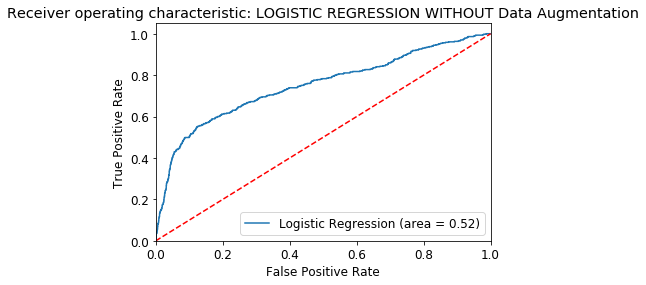

In [1026]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: LOGISTIC REGRESSION WITHOUT Data Augmentation')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

 - **Logistic regression**: f1-score **94%** and **9%** for the two labels. **ROC area = 0.52**.

## 03 - Data Augmentation: SMOTE (Synthetic Minority Over-sampling Technique)
Our **target data** (y = label_month5_payment) is **unbalanced**, since most of the training examples correspond to the label '0'. We used SMOTE algorithm to **synthesize new data** from existing one. SMOTE works by selecting data that are close or similar in the feature space and draws a line between data points making new data along the points on the line.
<br> <br> paper: https://arxiv.org/pdf/1106.1813.pdf

In [1027]:
# One-hot encoding
df = df_first_approach
df = pd.concat([df_first_approach,pd.get_dummies(df['gender'], prefix='gender',drop_first=True)],axis=1)
df = pd.concat([df,pd.get_dummies(df['education_level'], prefix='education_level',drop_first=True)],axis=1)
df = pd.concat([df,pd.get_dummies(df['marital_status'], prefix='marital_status',drop_first=True)],axis=1)
df = pd.concat([df,pd.get_dummies(df['age_categorical'], prefix='age_categorical',drop_first=True)],axis=1)

df.drop(['gender'],axis=1, inplace=True)
df.drop(['education_level'],axis=1, inplace=True)
df.drop(['marital_status'],axis=1, inplace=True)
df.drop(['age'],axis=1, inplace=True)
df.drop(['age_categorical'],axis=1, inplace=True)

# Standarize and reshape
scaler = StandardScaler() 
data = df
data['credit_limit'] = scaler.fit_transform(data['credit_limit'].values.reshape(-1, 1))
data['bill_amount_month1'] = scaler.fit_transform(data['bill_amount_month1'].values.reshape(-1, 1))
data['bill_amount_month2'] = scaler.fit_transform(data['bill_amount_month2'].values.reshape(-1, 1))
data['bill_amount_month3'] = scaler.fit_transform(data['bill_amount_month3'].values.reshape(-1, 1))
data['bill_amount_month4'] = scaler.fit_transform(data['bill_amount_month4'].values.reshape(-1, 1))
data['previous_payment_month1'] = scaler.fit_transform(data['previous_payment_month1'].values.reshape(-1, 1))
data['previous_payment_month2'] = scaler.fit_transform(data['previous_payment_month2'].values.reshape(-1, 1))
data['previous_payment_month3'] = scaler.fit_transform(data['previous_payment_month3'].values.reshape(-1, 1))
data['previous_payment_month4'] = scaler.fit_transform(data['previous_payment_month4'].values.reshape(-1, 1))

# Scale in range[0,1]
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Do data augmentation
X = data.loc[:, data.columns != 'label_month5_payment']
y = data.loc[:, data.columns == 'label_month5_payment']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
y_train=y_train.astype('int')
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y = pd.DataFrame(data=os_data_y,columns=['label_month5_payment'])

print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['label_month5_payment']==0]))
print("Number of subscription",len(os_data_y[os_data_y['label_month5_payment']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['label_month5_payment']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['label_month5_payment']==1])/len(os_data_X))

length of oversampled data is  22572
Number of no subscription in oversampled data 11286
Number of subscription 11286
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


<Figure size 432x288 with 0 Axes>

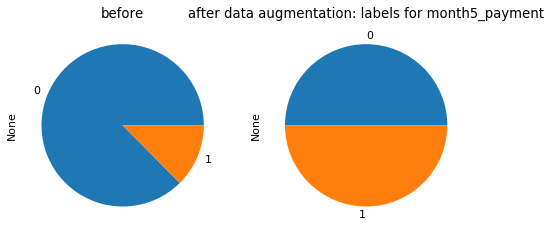

In [1028]:
plt.figure()
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(8,4))

plt.subplot(121)
plt.title('before')
target.size().plot(kind='pie')
plt.subplot(122)
plt.title('after data augmentation: labels for month5_payment')
target_with_data_augmentation = os_data_y.groupby('label_month5_payment')
target_with_data_augmentation.size().plot(kind='pie')

plt.show()

Now we can see that the **data examples for training our model are perfectly balanced!**.

In [1029]:
# Before data augmentation
y['label_month5_payment'].value_counts()

0.0    16134
1.0     2320
Name: label_month5_payment, dtype: int64

In [1030]:
# After data augmentation
os_data_y['label_month5_payment'].value_counts()

1    11286
0    11286
Name: label_month5_payment, dtype: int64

# 04 - Model 2: Logistic Regression + Data Augmentation

In [1031]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.2, random_state=0)
logreg_aug = LogisticRegression()
logreg_aug.fit(X_train, y_train)
y_pred = logreg_aug.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_aug.score(X_test, y_test)))

C:\Users\palod\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy of logistic regression classifier on test set: 0.68


C:\Users\palod\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [1032]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1611  651]
 [ 774 1479]]


In [1033]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      2262
           1       0.69      0.66      0.67      2253

    accuracy                           0.68      4515
   macro avg       0.68      0.68      0.68      4515
weighted avg       0.68      0.68      0.68      4515



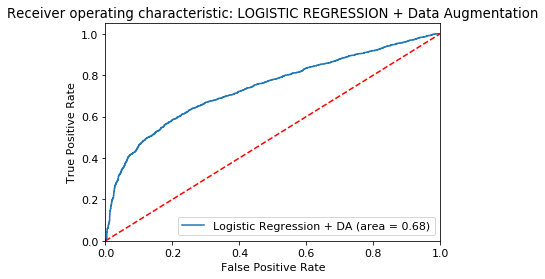

In [1034]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg_aug.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg_aug.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression + DA (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: LOGISTIC REGRESSION + Data Augmentation')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

After performing the data augmentation, the logistic regression model increased its performance significantly. 
<br> <br>
 - **Logistic regression**: f1-score **94%** and **9%** for the two labels. **ROC area = 0.52**.
<br>
 - **Logistic regression + data augmentation**: f1-score **69%** and **67%** for the two labels. **ROC area = 0.68**.

# 05 - Model 3: LDA (Linear Discriminant Analysis) + Data Augmentation

In [1035]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

lda_model = LinearDiscriminantAnalysis()

X_lda = lda_model.fit_transform(X_train, y_train)

y_pred = lda_model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6832779623477298


C:\Users\palod\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [1036]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1618  644]
 [ 786 1467]]


In [1037]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      2262
           1       0.69      0.65      0.67      2253

    accuracy                           0.68      4515
   macro avg       0.68      0.68      0.68      4515
weighted avg       0.68      0.68      0.68      4515



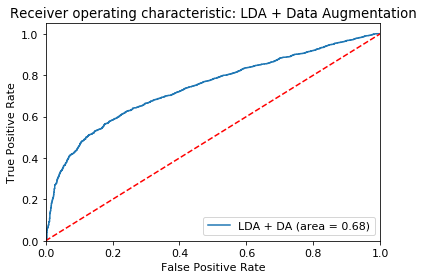

In [1038]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lda_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lda_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LDA + DA (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: LDA + Data Augmentation')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

 - **Logistic regression**: f1-score **94%** and **9%** for the two labels. **ROC area = 0.52**.
<br>
 - **Logistic regression + data augmentation**: f1-score **69%** and **67%** for the two labels. **ROC area = 0.68**.
<br>
 - **LDA + data augmentation**: f1-score **69%** and **67%** for the two labels. **ROC area = 0.68**.

# 06 - Model 4: Decision Tree + Data Augmentation

In [1039]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8396456256921373


In [1040]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1859  403]
 [ 321 1932]]


In [1041]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2262
           1       0.83      0.86      0.84      2253

    accuracy                           0.84      4515
   macro avg       0.84      0.84      0.84      4515
weighted avg       0.84      0.84      0.84      4515



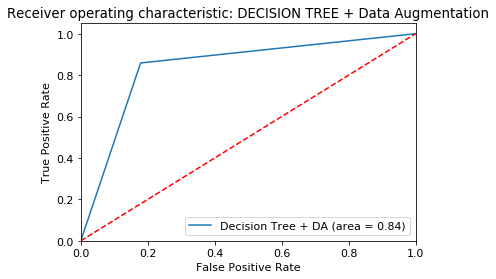

In [1042]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree + DA (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: DECISION TREE + Data Augmentation')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

 - **Logistic regression**: f1-score **94%** and **9%** for the two labels. **ROC area = 0.52**.
<br>
 - **Logistic regression + data augmentation**: f1-score **69%** and **67%** for the two labels. **ROC area = 0.68**.
<br>
 - **LDA + data augmentation**: f1-score **69%** and **67%** for the two labels. **ROC area = 0.68**.
<br>
 - **Decision tree + data augmentation**: f1-score **84%** and **84%** for the two labels. **ROC area = 0.84**.

# 07 - Model 5: Random Forest + Data Augmentation

In [1046]:
from sklearn.ensemble import RandomForestClassifier # Import Random Forest Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Create Decision Tree classifer object
random = RandomForestClassifier()

# Train Decision Tree Classifer
random = random.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = random.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

C:\Users\palod\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy: 0.9001107419712071


In [1047]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2085  177]
 [ 274 1979]]


In [1048]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2262
           1       0.92      0.88      0.90      2253

    accuracy                           0.90      4515
   macro avg       0.90      0.90      0.90      4515
weighted avg       0.90      0.90      0.90      4515



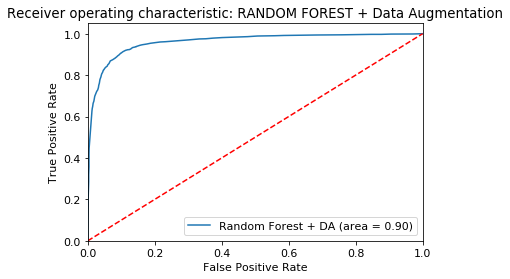

In [1049]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, random.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, random.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest + DA (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: RANDOM FOREST + Data Augmentation')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

 - **Logistic regression**: f1-score **94%** and **9%** for the two labels. **ROC area = 0.52**.
<br>
 - **Logistic regression + data augmentation**: f1-score **69%** and **67%** for the two labels. **ROC area = 0.68**.
<br>
 - **LDA + data augmentation**: f1-score **69%** and **67%** for the two labels. **ROC area = 0.68**.
<br>
 - **Decision tree + data augmentation**: f1-score **84%** and **84%** for the two labels. **ROC area = 0.84**.
<br>
 - **Random forest + data augmentation**: f1-score **90%** and **90%** for the two labels. **ROC area = 0.90**.

# 08 - Model 6: Feed-forward Neural Network

In [1050]:
import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(25, input_dim=25, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=18, batch_size=64, validation_data=(X_test, y_test))

Train on 18057 samples, validate on 4515 samples
Epoch 1/18
18057/18057 [==============================] - 3s 164us/step - loss: 0.6787 - accuracy: 0.5977 - val_loss: 0.6581 - val_accuracy: 0.6346
Epoch 2/18
18057/18057 [==============================] - 2s 100us/step - loss: 0.6422 - accuracy: 0.6508 - val_loss: 0.6244 - val_accuracy: 0.6662
Epoch 3/18
18057/18057 [==============================] - 2s 100us/step - loss: 0.6183 - accuracy: 0.6621 - val_loss: 0.6083 - val_accuracy: 0.6680
Epoch 4/18
18057/18057 [==============================] - 2s 103us/step - loss: 0.6057 - accuracy: 0.6743 - val_loss: 0.6000 - val_accuracy: 0.6757
Epoch 5/18
18057/18057 [==============================] - 2s 102us/step - loss: 0.5983 - accuracy: 0.6803 - val_loss: 0.5921 - val_accuracy: 0.6862
Epoch 6/18
18057/18057 [==============================] - 2s 106us/step - loss: 0.5919 - accuracy: 0.6830 - val_loss: 0.5888 - val_accuracy: 0.6862
Epoch 7/18
18057/18057 [==============================] - 2s 10

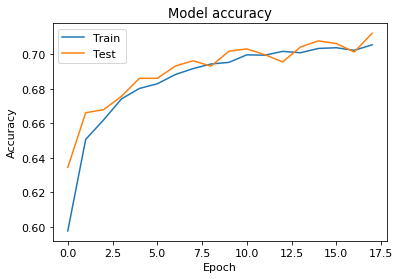

In [1051]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

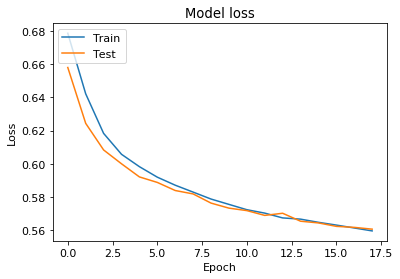

In [1052]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [1053]:
#Predict the response for test dataset
y_pred = model.predict_classes(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1844  418]
 [ 881 1372]]


In [1054]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74      2262
           1       0.77      0.61      0.68      2253

    accuracy                           0.71      4515
   macro avg       0.72      0.71      0.71      4515
weighted avg       0.72      0.71      0.71      4515



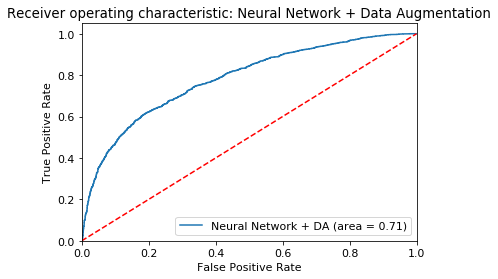

In [1055]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict_classes(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test))
plt.figure()
plt.plot(fpr, tpr, label='Neural Network + DA (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: Neural Network + Data Augmentation')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

 - **Logistic regression**: f1-score **94%** and **9%** for the two labels. **ROC area = 0.52**.
<br>
 - **Logistic regression + data augmentation**: f1-score **69%** and **67%** for the two labels. **ROC area = 0.68**.
<br>
 - **LDA + data augmentation**: f1-score **69%** and **67%** for the two labels. **ROC area = 0.68**.
<br>
 - **Decision tree + data augmentation**: f1-score **83%** and **84%** for the two labels. **ROC area = 0.84**.
<br>
 - **Random forest + data augmentation**: f1-score **90%** and **90%** for the two labels. **ROC area = 0.90**.
<br>
 - **Neural network + data augmentation**: f1-score **74%** and **68%** for the two labels. **ROC area = 0.71**.

# 09 - Prediction for test data

Since the best performance was obtained with the **Random Forest model**, we will use it to predict the outcome of the new data. **Will the clients pay their bill or not in the fifth month?**
<br> We hope that the data augmentation performed can help the Random Forest model **generalizing well** and therefore we can obtain an accurate prediction.

In [1056]:
df_test = pd.read_csv("test.csv")
df_test.head(5)

,id,credit_limit,gender,education_level,marital_status,age,payment_delay_month4(larger value means longer delay),payment_delay_month3(larger value means longer delay),payment_delay_month2(larger value means longer delay),payment_delay_month1(larger value means longer delay),bill_amount_month4,bill_amount_month3,bill_amount_month2,bill_amount_month1,previous_payment_month4,previous_payment_month3,previous_payment_month2,previous_payment_month1,label_month5_payment
0,23208,1788.854382,M,university,single,24.0,1.0,1.0,1.0,1.0,1575.742270,914.230348,1103.194295,1496.144766,139.638180,126.343105,239.255805,0.000000,NaN
1,23209,13374.806100,F,university,single,29.0,-1.0,-1.0,-1.0,-1.0,851.135758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2,23210,44157.469690,F,graduate_school,single,30.0,3.0,3.0,3.0,3.0,41898.135590,43421.190960,44016.974810,44606.717640,1165.864088,752.120619,752.120619,0.000000,NaN
3,23211,105024.754300,F,university,single,33.0,NaN,3.0,3.0,1.0,104091.472200,108043.199300,104471.142100,44646.288140,4383.993984,1.100981,382.989549,57090.434060,NaN
4,23212,152286.022800,M,graduate_school,married,49.0,-1.0,-1.0,-1.0,-1.0,6336.643691,607.175603,169.498049,682.283173,607.175603,171.034746,698.548861,28.343813,NaN


After reading the test.csv, we will treat it exactly as our training and validation dataset (removing unwanted elements, one-hot-encoding, scaling, etc):
 - **Remove index**
 - **Replace NaN** values of **payment_delay_month[i]** by **payment_delay_month[i-1]**, since it is correlated with the target. 
 - **Replace NaN** values of the rest of the columns with the **median** value of each column.
 - **Fix categorical values** (education, marital status, etc)
 - **Categorize age by groups**
 - Do **one-hot-encoding** of **class labels**.
 - **Scaling**.
 - Match **matrices (dataframes) sizes**.
<br> <br> Then the prediction will be made.

In [1057]:
# drop axis and target
df_test = df_test.drop(['id'], axis=1)
df_test = df_test.drop(['label_month5_payment'], axis=1)


# fill payment_delay_month[i] by payment_delay_month[i-1]
df_test['payment_delay_month4(larger value means longer delay)'].fillna(df_test['payment_delay_month3(larger value means longer delay)'], inplace=True)
df_test['payment_delay_month3(larger value means longer delay)'].fillna(df_test['payment_delay_month2(larger value means longer delay)'], inplace=True)
df_test['payment_delay_month2(larger value means longer delay)'].fillna(df_test['payment_delay_month1(larger value means longer delay)'], inplace=True)

# substitute by median (numerical values)
df_test = df_test.fillna(df_test.median())

# fix education level (categorical value)
df_test.loc[df_test['education_level'] == '0', 'education_level'] = 'unknown'
df_test.loc[df_test['education_level'] == 'unviersity', 'education_level'] = 'university'
by_education_level = df_test.groupby('education_level')
by_education_level.size()

# fix marital status (categorical value)
df_test.loc[df_test['marital_status'] == '0', 'marital_status'] = 'unknown'
by_marital_status = df_test.groupby('marital_status')
by_marital_status.size()

# group by ages (categorical value)
df_test.loc[df_test['age'] >= 110, 'age_categorical'] = 'unknown'
df_test.loc[df_test['age'] <= 0 , 'age_categorical'] = 'unknown'
df_test.loc[(df_test['age'] <20) & (df_test['age'] > 0) , 'age_categorical'] = 'under_20'
df_test.loc[(df_test['age']>=20) & (df_test['age'] < 25) , 'age_categorical'] = '20-25'
df_test.loc[(df_test['age']>=25) & (df_test['age'] < 35) , 'age_categorical'] = '25-35'
df_test.loc[(df_test['age']>=35) & (df_test['age'] < 45) , 'age_categorical'] = '35-45'
df_test.loc[(df_test['age']>=45) & (df_test['age'] < 110) , 'age_categorical'] = 'older_45'
by_age_cat = df_test.groupby('age_categorical')
#by_age_cat.size().plot(kind='pie')

# one-hot-encoding of class labels (categorical value)
# use pd.concat to join the new columns with the original dataframe
#df = df_first_approach
df_test = pd.concat([df_test,pd.get_dummies(df_test['gender'], prefix='gender',drop_first=True)],axis=1)
df_test = pd.concat([df_test,pd.get_dummies(df_test['education_level'], prefix='education_level',drop_first=True)],axis=1)
df_test = pd.concat([df_test,pd.get_dummies(df_test['marital_status'], prefix='marital_status',drop_first=True)],axis=1)
df_test = pd.concat([df_test,pd.get_dummies(df_test['age_categorical'], prefix='age_categorical',drop_first=True)],axis=1)
# now drop the original columns
df_test.drop(['gender'],axis=1, inplace=True)
df_test.drop(['education_level'],axis=1, inplace=True)
df_test.drop(['marital_status'],axis=1, inplace=True)
df_test.drop(['age'],axis=1, inplace=True)
df_test.drop(['age_categorical'],axis=1, inplace=True)

# Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler() 
#data = df_test
df_test['credit_limit'] = scaler.fit_transform(df_test['credit_limit'].values.reshape(-1, 1))
df_test['bill_amount_month1'] = scaler.fit_transform(df_test['bill_amount_month1'].values.reshape(-1, 1))
df_test['bill_amount_month2'] = scaler.fit_transform(df_test['bill_amount_month2'].values.reshape(-1, 1))
df_test['bill_amount_month3'] = scaler.fit_transform(df_test['bill_amount_month3'].values.reshape(-1, 1))
df_test['bill_amount_month4'] = scaler.fit_transform(df_test['bill_amount_month4'].values.reshape(-1, 1))
df_test['previous_payment_month1'] = scaler.fit_transform(df_test['previous_payment_month1'].values.reshape(-1, 1))
df_test['previous_payment_month2'] = scaler.fit_transform(df_test['previous_payment_month2'].values.reshape(-1, 1))
df_test['previous_payment_month3'] = scaler.fit_transform(df_test['previous_payment_month3'].values.reshape(-1, 1))
df_test['previous_payment_month4'] = scaler.fit_transform(df_test['previous_payment_month4'].values.reshape(-1, 1))
scaler = MinMaxScaler()
df_test = pd.DataFrame(scaler.fit_transform(df_test), columns=df_test.columns)

# add last column of unknown age to match sizes
df_test['age_categorical_unknown'] = 0
df_test['age_categorical_unknown'] = df_test['age_categorical_unknown'].astype(float)

df_test.head()

,credit_limit,payment_delay_month4(larger value means longer delay),payment_delay_month3(larger value means longer delay),payment_delay_month2(larger value means longer delay),payment_delay_month1(larger value means longer delay),bill_amount_month4,bill_amount_month3,bill_amount_month2,bill_amount_month1,previous_payment_month4,...,education_level_others,education_level_university,education_level_unknown,marital_status_others,marital_status_single,marital_status_unknown,age_categorical_25-35,age_categorical_35-45,age_categorical_older_45,age_categorical_unknown
0,0.000000,0.2,0.222222,0.222222,0.222222,0.005127,0.003538,0.001032,0.006214,0.001517,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.028062,0.0,0.000000,0.000000,0.000000,0.002769,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.102619,0.4,0.444444,0.444444,0.444444,0.136312,0.168038,0.041169,0.185262,0.012663,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.250043,0.4,0.444444,0.444444,0.222222,0.338652,0.418121,0.097713,0.185427,0.047618,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.364513,0.0,0.000000,0.000000,0.000000,0.020616,0.002350,0.000159,0.002834,0.006595,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1058]:
# compare the order of features with training data (X matrix)
os_data_X.head()

,credit_limit,payment_delay_month4(larger value means longer delay),payment_delay_month3(larger value means longer delay),payment_delay_month2(larger value means longer delay),payment_delay_month1(larger value means longer delay),bill_amount_month4,bill_amount_month3,bill_amount_month2,bill_amount_month1,previous_payment_month4,...,education_level_others,education_level_university,education_level_unknown,marital_status_others,marital_status_single,marital_status_unknown,age_categorical_25-35,age_categorical_35-45,age_categorical_older_45,age_categorical_unknown
0,0.004373,0.2,0.2,0.2,0.4,0.006597,0.011956,0.017978,0.010609,0.006216,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.060378,0.2,0.2,0.2,0.0,0.031429,0.013220,0.000000,0.000000,0.000470,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.004373,0.2,0.2,0.2,0.2,0.006660,0.004157,0.006923,0.005654,0.000285,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.131000,0.0,0.0,0.0,0.0,0.000059,0.000551,0.000000,0.000065,0.000639,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.276567,0.2,0.2,0.2,0.2,0.177195,0.180111,0.279833,0.084202,0.087921,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [1059]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   credit_limit                                           3000 non-null   float64
 1   payment_delay_month4(larger value means longer delay)  3000 non-null   float64
 2   payment_delay_month3(larger value means longer delay)  3000 non-null   float64
 3   payment_delay_month2(larger value means longer delay)  3000 non-null   float64
 4   payment_delay_month1(larger value means longer delay)  3000 non-null   float64
 5   bill_amount_month4                                     3000 non-null   float64
 6   bill_amount_month3                                     3000 non-null   float64
 7   bill_amount_month2                                     3000 non-null   float64
 8   bill_amount_month1                              

We finally make the prediction with our **Random Forest model**:
<br>
 - **Most of the test examples are predicted to be 1 (76%)**, opposing the initial tendency of the dataset (towards the label 0). This probably indicates that our efforts to balance the dataset in order to get a model that generalizes well were successful.

In [1060]:
y_pred_test = random.predict(df_test)
counter_of_one = np.count_nonzero(y_pred_test == 1)
np.save('prediction_pablo.npy', y_pred_test) # save
#------------------------------------------------------------------------
#-------------------------- LOAD the file -------------------------------
#------------------------------------------------------------------------
# prediction_pablo = np.load('prediction_pablo.npy') # load
#------------------------------------------------------------------------
#------------------------------------------------------------------------
#------------------------------------------------------------------------

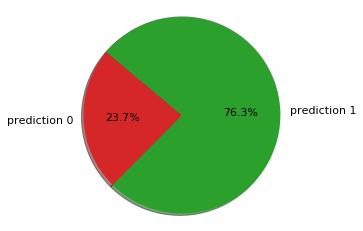

In [1061]:
labels = 'prediction 0', 'prediction 1'
sizes = [len(df_test)-counter_of_one, counter_of_one]
colors = ['tab:red', 'tab:green']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# Conclusion

 - I spent the majority of the time doing **data cleaning** and **feature engineering**, as I understand the importance of having "workable", clean data.
 - The **data exploration** is not as exhaustive as I would have liked it, but some insights were found.
 - I also did **data augmentation** since the EDA revealed the lack of balanced data for our target.
 - Several **models** were implemented and several **scores** were calculated.

# Future

Regarding a future approach that would be able to resolve this problem in a more accurate way, I believe an **ensemble of Random Forest with some type of neural network** to capture time dependencies of payments (RNN, LSTM, etc) constitutes a good approach.

### Thanks for reading!
### If you have any **question** regarding this project: pablo@gapp.nthu.edu.tw
### If you want to check other cool projects: https://github.com/pablomp3
### If you're looking for a Data Scientist with an international focus and technically proficient, send me an email!